## Data Loading & Preprocessing:

In [4]:
#import numpy as np # 
import pandas as pd 
df = pd.read_csv(r"HI-Small_Trans.csv")
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


## Exploratory Data Analysis (EDA):

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [6]:
df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(9)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(5078336, 11)

In [10]:
df.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

## AML Analysis:

In [11]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df['From Bank']= df['From Bank'].astype('object')
df['To Bank']= df['To Bank'].astype("object")
df['Is Laundering']= df["Is Laundering"].astype('object')

In [12]:
df.dtypes

Timestamp             datetime64[ns]
From Bank                     object
Account                       object
To Bank                       object
Account.1                     object
Amount Received              float64
Receiving Currency            object
Amount Paid                  float64
Payment Currency              object
Payment Format                object
Is Laundering                 object
dtype: object

<Axes: >

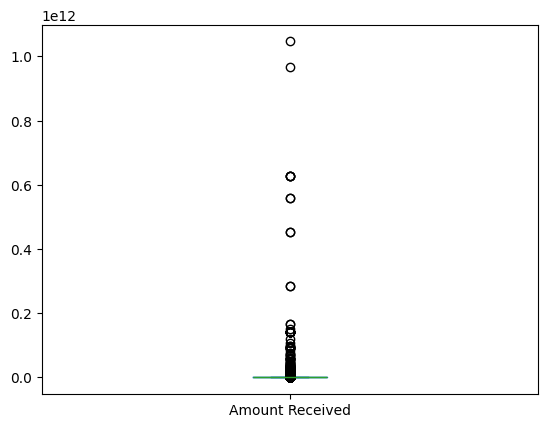

In [13]:
df['Amount Received'].plot(kind='box')

In [14]:
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [15]:
df['Date']=df["Timestamp"].dt.date

In [16]:
df['Time']=df["Timestamp"].dt.time

In [17]:
df.head(3)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date,Time
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0,2022-09-01,00:20:00
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0,2022-09-01,00:20:00
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0,2022-09-01,00:00:00


<Axes: xlabel='Date'>

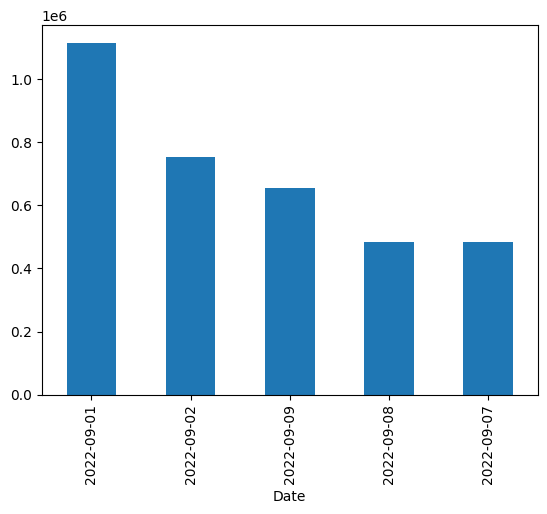

In [18]:
df['Date'].value_counts().head().plot(kind='bar')

<Axes: xlabel='Time'>

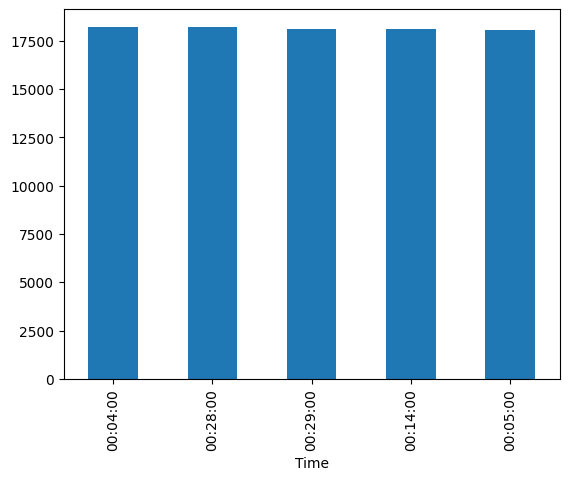

In [19]:
df['Time'].value_counts().head().plot(kind='bar')

In [20]:
df['Amount Received'].max()

np.float64(1046302363293.48)

In [21]:
df['Amount Received'].min()

np.float64(1e-06)

In [22]:
df['Amount Received'].mean()

np.float64(5988736.683497084)

In [23]:
df['Amount Paid'].mean()

np.float64(4509281.359229194)

In [24]:
df['Payment Currency'].unique()

array(['US Dollar', 'Bitcoin', 'Euro', 'Australian Dollar', 'Yuan',
       'Rupee', 'Yen', 'Mexican Peso', 'UK Pound', 'Ruble',
       'Canadian Dollar', 'Swiss Franc', 'Brazil Real', 'Saudi Riyal',
       'Shekel'], dtype=object)

In [25]:
df['Payment Format'].unique()

array(['Reinvestment', 'Cheque', 'Credit Card', 'ACH', 'Cash', 'Wire',
       'Bitcoin'], dtype=object)

In [26]:
df['Is Laundering'].value_counts()

Is Laundering
0    5073159
1       5177
Name: count, dtype: int64

In [27]:
df['Is Laundering'].value_counts()/df.shape[0]

Is Laundering
0    0.998981
1    0.001019
Name: count, dtype: float64

In [28]:
df[df['Is Laundering']==1]

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date,Time
4742,2022-09-01 00:21:00,70,100428660,1124,800825340,389769.39,US Dollar,389769.39,US Dollar,Cheque,1,2022-09-01,00:21:00
40621,2022-09-01 00:03:00,70,100428660,11474,805B716C0,29024.33,US Dollar,29024.33,US Dollar,Credit Card,1,2022-09-01,00:03:00
69152,2022-09-01 00:01:00,70,100428660,15980,80B39E7B0,792.92,US Dollar,792.92,US Dollar,Credit Card,1,2022-09-01,00:01:00
85763,2022-09-01 00:03:00,70,100428660,113798,80DC756E0,13171425.53,US Dollar,13171425.53,US Dollar,Cheque,1,2022-09-01,00:03:00
90684,2022-09-01 00:23:00,70,100428660,32375,80E480620,14288.83,US Dollar,14288.83,US Dollar,Cash,1,2022-09-01,00:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071168,2022-09-10 23:29:00,111433,8065C2380,21550,8065C69E0,7773.42,US Dollar,7773.42,US Dollar,ACH,1,2022-09-10,23:29:00
5073375,2022-09-10 23:07:00,9,80727F930,219557,8072A28C0,448920.65,Ruble,448920.65,Ruble,Cheque,1,2022-09-10,23:07:00
5074248,2022-09-12 03:34:00,222,812D127D0,50202,812D129C0,20085.71,Saudi Riyal,20085.71,Saudi Riyal,ACH,1,2022-09-12,03:34:00
5075056,2022-09-10 23:43:00,17327,8095F6C20,15695,8095F6C70,3314.36,US Dollar,3314.36,US Dollar,ACH,1,2022-09-10,23:43:00


In [29]:
df[df['Is Laundering']==1]['Date']

4742       2022-09-01
40621      2022-09-01
69152      2022-09-01
85763      2022-09-01
90684      2022-09-01
              ...    
5071168    2022-09-10
5073375    2022-09-10
5074248    2022-09-12
5075056    2022-09-10
5077204    2022-09-10
Name: Date, Length: 5177, dtype: object

In [30]:
df[df['Is Laundering']==1]['Date'].value_counts()

Date
2022-09-08    539
2022-09-06    531
2022-09-09    514
2022-09-07    497
2022-09-05    471
2022-09-10    442
2022-09-02    408
2022-09-04    407
2022-09-03    391
2022-09-01    322
2022-09-11    232
2022-09-12    170
2022-09-13    106
2022-09-14     70
2022-09-15     28
2022-09-16     26
2022-09-17     15
2022-09-18      8
Name: count, dtype: int64

<Axes: xlabel='Date'>

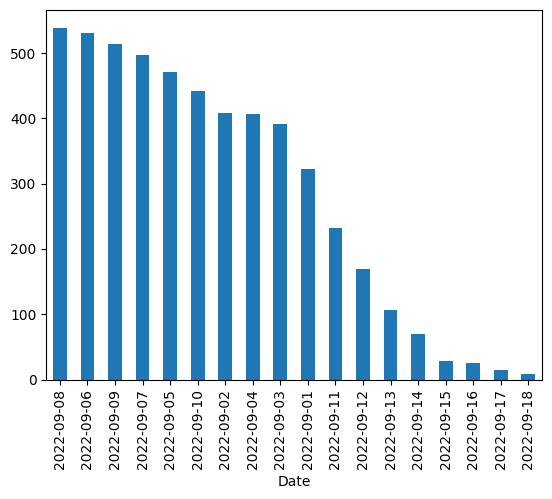

In [31]:
df[df['Is Laundering']==1]['Date'].value_counts().plot(kind='bar')

In [32]:
df[df['Is Laundering']==1]['Time'].value_counts()

Time
12:32:00    14
12:07:00    12
14:51:00    11
16:21:00    11
16:53:00    11
            ..
20:58:00     1
03:01:00     1
10:57:00     1
00:24:00     1
06:44:00     1
Name: count, Length: 1383, dtype: int64

<Axes: xlabel='Time'>

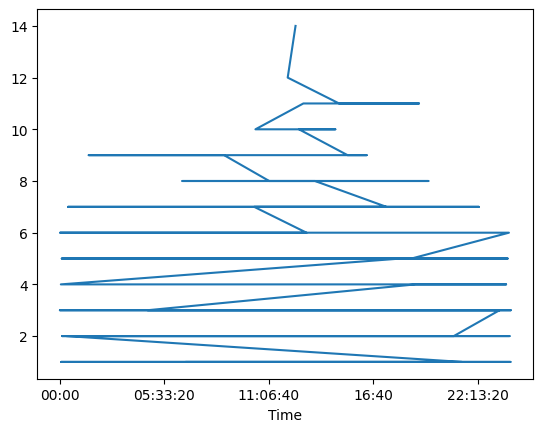

In [33]:
df[df['Is Laundering']==1]['Time'].value_counts().plot(kind='line')

In [34]:
df[df['Is Laundering']==1]['From Bank'].value_counts().head()

From Bank
70     633
12      76
20      67
119     59
10      51
Name: count, dtype: int64

<Axes: xlabel='From Bank'>

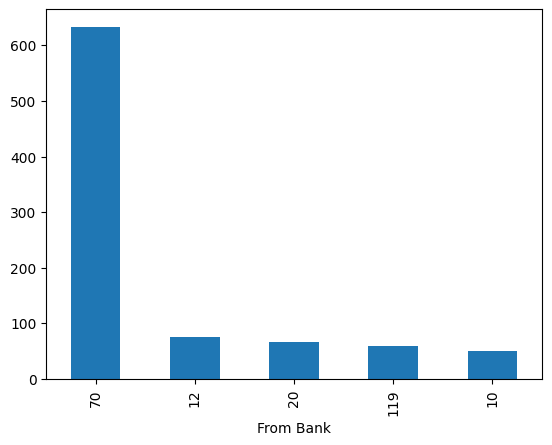

In [35]:
df[df['Is Laundering']==1]['From Bank'].value_counts().head().plot(kind='bar')

In [36]:
df[df['Payment Currency']=='US Dollar']

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date,Time
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.34,US Dollar,Reinvestment,0,2022-09-01,00:20:00
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.01,US Dollar,Cheque,0,2022-09-01,00:20:00
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.57,US Dollar,Reinvestment,0,2022-09-01,00:00:00
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.97,US Dollar,Reinvestment,0,2022-09-01,00:02:00
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.97,US Dollar,Reinvestment,0,2022-09-01,00:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078167,2022-09-10 23:30:00,23537,803949A90,23537,803949A90,26421.500000,Shekel,7823.96,US Dollar,ACH,0,2022-09-10,23:30:00
5078234,2022-09-10 23:59:00,16163,803638A90,16163,803638A90,47517.490000,Saudi Riyal,12667.62,US Dollar,ACH,0,2022-09-10,23:59:00
5078236,2022-09-10 23:55:00,16163,803638A90,16163,803638A90,11329.850000,Saudi Riyal,3020.41,US Dollar,ACH,0,2022-09-10,23:55:00
5078316,2022-09-10 23:44:00,215064,808F06E11,215064,808F06E10,0.000006,Bitcoin,0.07,US Dollar,ACH,0,2022-09-10,23:44:00


In [37]:
df[(df['Is Laundering'] == 1) & (df['Payment Currency'] == "US Dollar")]['Amount Paid'].sum()

np.float64(1208385176.9299998)

In [38]:
df[df['Is Laundering'] == 1]['Payment Format'].value_counts()

Payment Format
ACH            4483
Cheque          324
Credit Card     206
Cash            108
Bitcoin          56
Name: count, dtype: int64

<Axes: xlabel='Payment Format'>

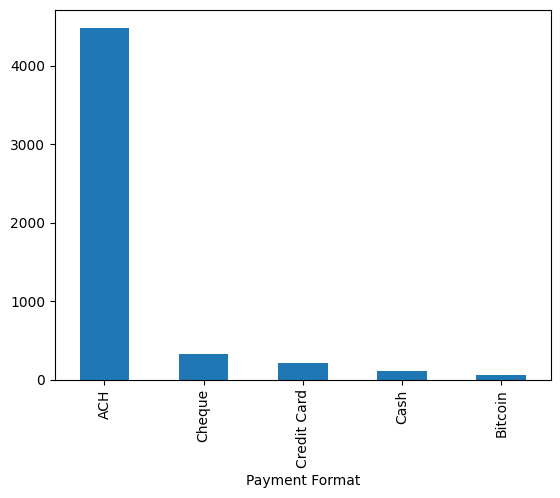

In [39]:
df[df['Is Laundering'] == 1]['Payment Format'].value_counts().plot(kind="bar")

In [40]:
df['Week']=df['Timestamp'].dt.day_name()

In [41]:
df.drop(["Timestamp",'Date'],axis =1,inplace = True)

In [42]:
df.head(2)

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Time,Week
0,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0,00:20:00,Thursday
1,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0,00:20:00,Thursday


In [43]:
df.drop('Time',axis = 1,inplace = True)

In [44]:
contingency = pd.crosstab(df['Is Laundering'], df['Week'])

In [45]:
import scipy.stats as st
x,p,y,z = st.chi2_contingency(contingency)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relation ship")

There is a relationship


In [46]:
contingency = pd.crosstab(df['Payment Format'],df['Is Laundering'])
x,p,y,z = st.chi2_contingency(contingency)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relation ship")

There is a relationship


In [47]:
contingency = pd.crosstab(df['Payment Currency'],df['Is Laundering'])
x,p,y,z = st.chi2_contingency(contingency)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relation ship")

There is a relationship


In [48]:
X = df.drop(['Is Laundering'],axis = 1)
y = df['Is Laundering']

cat = ['From Bank','Account','To Bank','Receiving Currency','Payment Currency','Payment Format','Week']

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

ohe = Pipeline([('Encoder',OneHotEncoder(drop = 'first',handle_unknown='ignore'))])

transformer = ColumnTransformer([('One Hot Encoding',ohe,cat)])

model = Pipeline([("Transformer",transformer),
                 ("Estimator",XGBClassifier())])

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test.astype('int'),y_pred))

c:\Users\Sanskriti\Downloads\AML_ML\.aml\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1521879
           1       0.95      0.06      0.12      1622

    accuracy                           1.00   1523501
   macro avg       0.98      0.53      0.56   1523501
weighted avg       1.00      1.00      1.00   1523501

